In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [132]:
df = pd.read_csv("UberDataset.csv")

In [107]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [108]:
df.sample(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1054,12/15/2016 14:20,12/15/2016 14:54,Business,Cary,Morrisville,10.6,Meeting
853,10/24/2016 16:34,10/24/2016 16:41,Business,Morrisville,Cary,2.2,NaN
1070,12/19/2016 19:55,12/19/2016 20:30,Business,Unknown Location,Unknown Location,11.0,Meeting
323,4/22/2016 8:25,4/22/2016 9:04,Business,Cary,Raleigh,13.6,Meeting
361,05-09-2016 06:08,05-09-2016 06:25,Business,Cary,Morrisville,8.4,Customer Visit


In [109]:
df.shape

(1156, 7)

In [110]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing


In [113]:
#replace NaN to NOT
df["PURPOSE"].fillna("NOT",inplace = True)

In [114]:
df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [115]:
#change the format of startdate and enddate

In [136]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"],errors = "coerce")

In [117]:
df["END_DATE"] = pd.to_datetime(df["END_DATE"],errors = "coerce")

In [118]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [120]:
from datetime import datetime


df["date"] = pd.DatetimeIndex(df["START_DATE"]).date

In [121]:
df["time"] = pd.DatetimeIndex(df["START_DATE"]).hour

In [122]:
df["day_night"] = pd.cut(x = df["time"],bins = [0,10,15,19,24],labels = ['Morning','Afternoon','Evening','Night'])

In [123]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [156]:
df.dropna(inplace = True)

In [125]:
df.shape

(413, 10)

# Data Visulisation

<Axes: xlabel='PURPOSE', ylabel='count'>

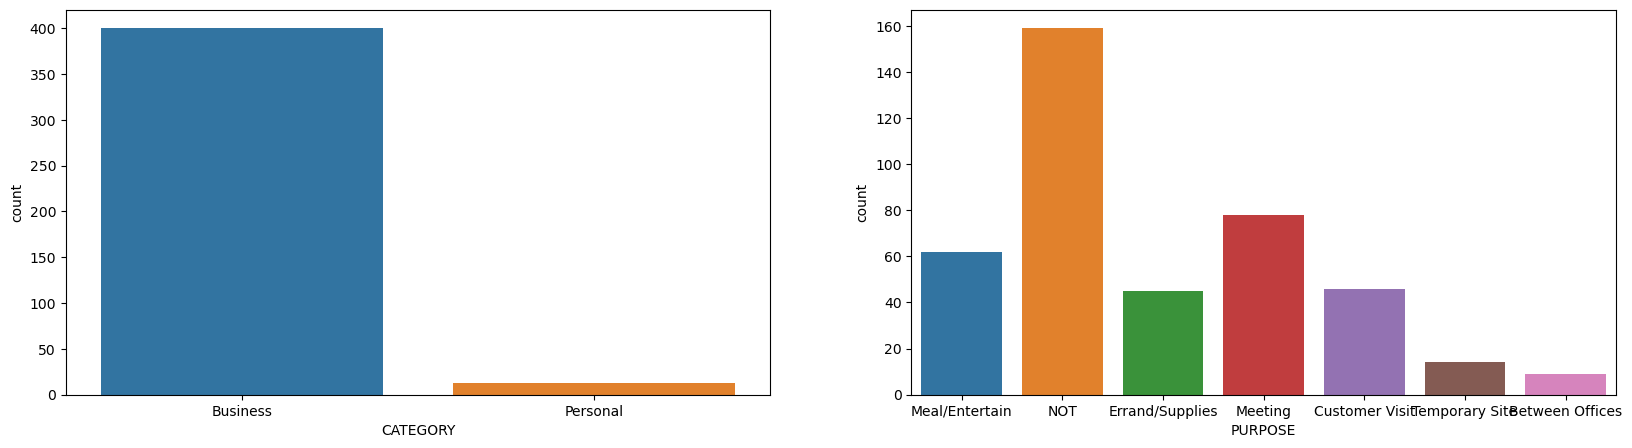

In [127]:
#in which category do people boom the most uber rides?
#for which pupose do people book uber rides the most?

plt.figure(figsize = (20,5))



plt.subplot(1,2,1)
sns.countplot(x = df["CATEGORY"])
plt.subplot(1,2,2)
sns.countplot(x=df["PURPOSE"])

<Axes: xlabel='day_night', ylabel='count'>

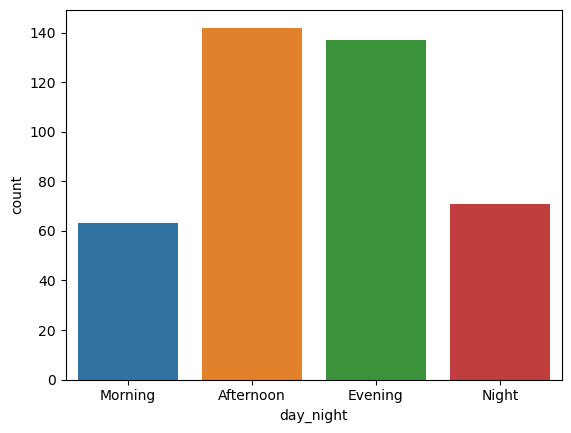

In [128]:
#at which time do people book cabs most from uber?
sns.countplot(x = df["day_night"])

In [129]:

df["month"] = pd.DatetimeIndex(df["START_DATE"]).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'} 
df["month"] = df.month.map(month_label)
mon = df.month.value_counts(sort=False) 

[Text(0.5, 0, 'month'), Text(0, 0.5, 'VALUE COUNT')]

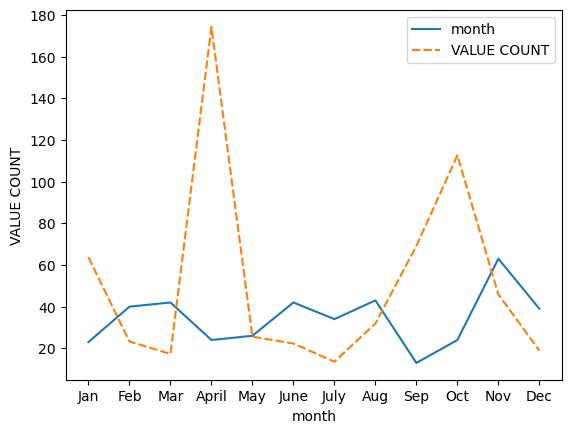

In [130]:
#in which month do people book uber rides less frequently?

df = pd.DataFrame({
 "month": mon.values, # Har month ka total count.
 "VALUE COUNT": df.groupby('month', sort=False)['MILES'].max() # Har month kaa ax miles
})
p = sns.lineplot(data=df) # Line plot banata hai.
p.set(xlabel="month", ylabel="VALUE COUNT") # Axis labels set karta ha

In [138]:
# Extract weekday and map to labels
df['DAY'] = df['START_DATE'].dt.weekday
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY'] = df['DAY'].map(day_label)

In [140]:

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fri
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,Sat
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Sat
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tues
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wed


Text(0, 0.5, 'count')

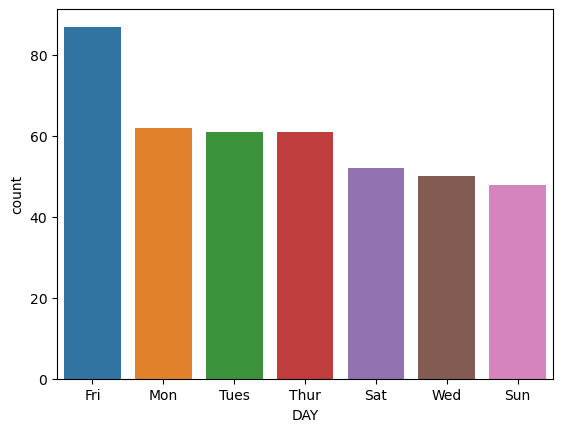

In [146]:
#on which days of the week do people uber rides the most?

day_label = df["DAY"].value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel ('DAY')
plt.ylabel('count')

In [148]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fri
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,Sat
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Sat
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tues
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wed


<Axes: >

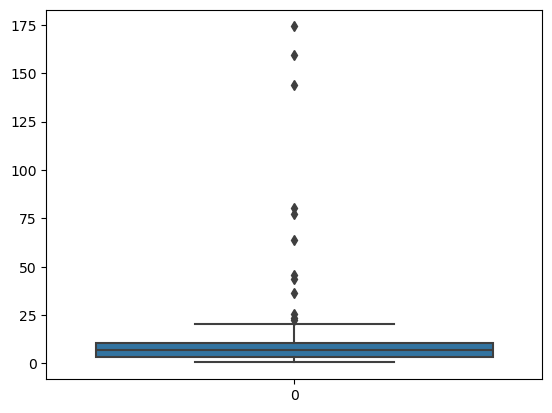

In [158]:
sns.boxplot(df["MILES"])

<Axes: >

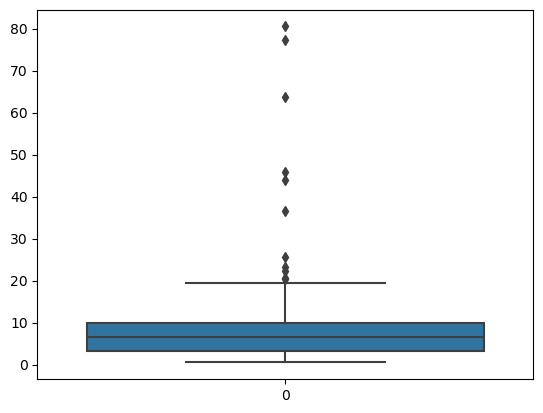

In [160]:
sns.boxplot(df[df['MILES']<100]['MILES'])


<Axes: >

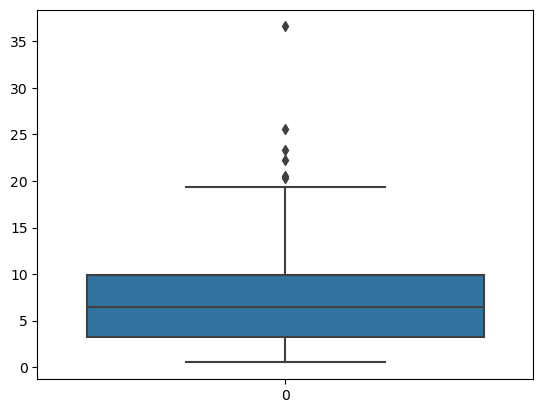

In [164]:
sns.boxplot(df[df['MILES']<40]['MILES'])


C:\Users\sonis\AppData\Local\Temp\ipykernel_16112\1171915261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

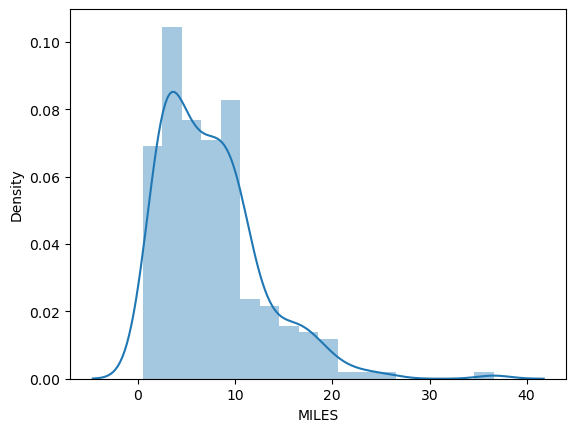

In [166]:
#how many miles do people usually 
sns.distplot(df[df['MILES']<40]['MILES'])